# Case Study: Fast Food

### Step 1: Deciding (not) to Segment
McDonald’s can take the position that it caters to the entire market and that
there is no need to understand systematic differences across market segments.
Alternatively, McDonald’s can take the position that, despite their market power,
there is value in investigating systematic heterogeneity among consumers and
harvest these differences using a differentiated marketing strategy.

### Step 2: Specifying the Ideal Target Segment
McDonald’s management needs to decide which key features make a market segment attractive to them. In terms of knock-out criteria, the target segment or target segments must be homogeneous (meaning that segment members are similar to one
another in a key characteristic), distinct, large enough to justify the development and implementation of a customised marketing
mix, matching the strengths of McDonald’s identifiable and finally reachable.

### Step 3: Collecting Data
The data set contains responses from 1453 adult Australian consumers relating to
their perceptions of McDonald’s with respect to the following attributes: YUMMY,
CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE, HEALTHY, and DISGUSTING. These attributes emerged from a qualitative study con-
ducted in preparation of the survey study. For each of those attributes, respondents
provided either a YES response or a NO response.

### Step 4: Exploring Data

In [14]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [15]:
mcdonalds = pd.read_csv("C:/Users/Ehtesham/OneDrive/Desktop/McDonalds Case Study/McDonalds Case Study/mcdonalds.csv")
print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head())

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a 

In [16]:
# Convert Yes/No responses into binary format
MD_x = mcdonalds.iloc[:, 0:11].applymap(lambda x: 1 if x == "Yes" else 0)

# Calculating column means
col_means = MD_x.mean()
print(col_means.round(2))


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


Explained Variance Ratio: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


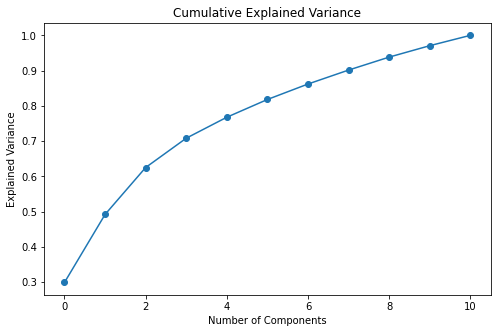

In [17]:
# Performing PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()


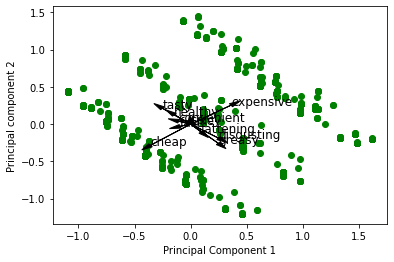

In [18]:
mcd = pd.read_csv("C:/Users/Ehtesham/OneDrive/Desktop/McDonalds Case Study/McDonalds Case Study/mcdonalds.csv")

# Binary numeric segmentation variables
MD_x = mcd.iloc[:, 1:12].apply(lambda x: (x == "Yes") + 0)

MD_pca = PCA(n_components=3)
MD_pca.fit(MD_x)

# Plot first two principal components
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], color="green")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal component 2")

proj_axes = MD_pca.components_.T * np.sqrt(MD_pca.explained_variance_)
for i in range(len(proj_axes)):
    plt.arrow(0, 0, proj_axes[i, 0], proj_axes[i, 1], head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.annotate(MD_x.columns[i], (proj_axes[i, 0], proj_axes[i, 1]), size=12)

plt.show()

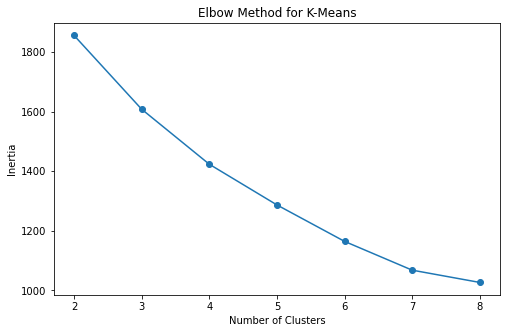

In [19]:
# K-Means clusters
inertia = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), inertia, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



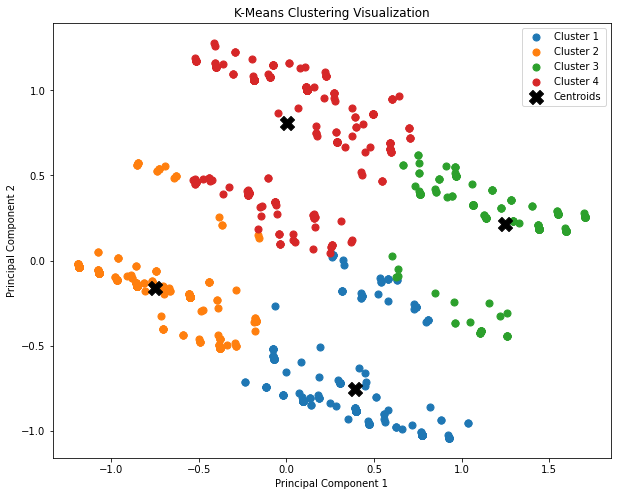

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

file_path = "C:/Users/Ehtesham/OneDrive/Desktop/McDonalds Case Study/McDonalds Case Study/mcdonalds.csv"
mcdonalds = pd.read_csv(file_path)



# Fit K-Means clustering with the optimal number of clusters
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=1234)
clusters = kmeans.fit_predict(MD_pca_2d)

# Plot the clustering result
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_data = MD_pca_2d[clusters == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}', s=50)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title('K-Means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


1    476
2    421
0    319
3    237
Name: Cluster, dtype: int64
               Age      
              mean count
Cluster                 
0        40.689655   319
1        42.989496   476
2        47.800475   421
3        47.443038   237


C:\Users\Ehtesham\AppData\Local\Temp\ipykernel_14124\3510986500.py:10: FutureWarning: ['Gender', 'VisitFrequency', 'Like'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_profile = mcdonalds.groupby('Cluster')[['Age', 'Gender', 'VisitFrequency', 'Like']].agg(['mean', 'count'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


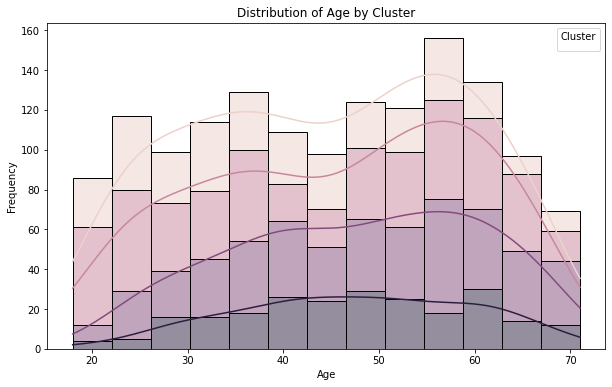

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


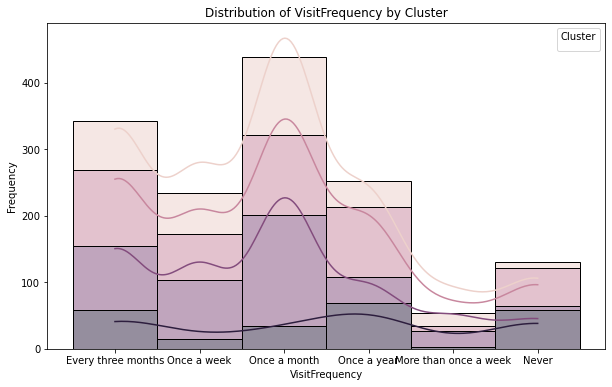

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


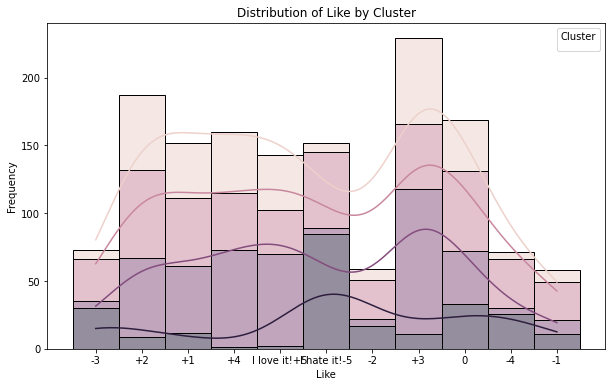

In [24]:
# Perform clustering with the optimal number of clusters
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=1234)
mcdonalds['Cluster'] = kmeans.fit_predict(MD_x)


print(mcdonalds['Cluster'].value_counts())


cluster_profile = mcdonalds.groupby('Cluster')[['Age', 'Gender', 'VisitFrequency', 'Like']].agg(['mean', 'count'])
print(cluster_profile)

features = ['Age', 'VisitFrequency', 'Like']

# Creating histograms for each feature, separated by cluster
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=mcdonalds, x=feature, hue='Cluster', multiple='stack', kde=True)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Cluster')
    plt.show()


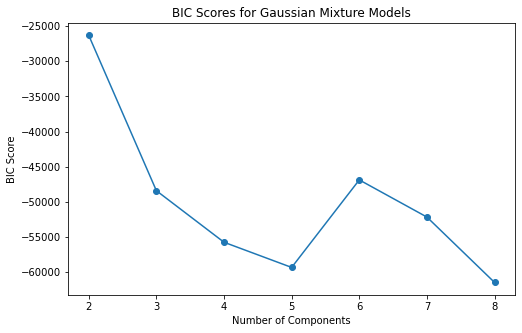

In [22]:
# Using Mixtures of Regression Models
bic_scores = []
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, random_state=1234)
    gmm.fit(MD_x)
    bic_scores.append(gmm.bic(MD_x))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), bic_scores, marker='o')
plt.title('BIC Scores for Gaussian Mixture Models')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.show()
